# Unsupervised Learning in Python(1) - Clustering for dataset exploration

## Unsupervised learning

### How many clusters?

You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

matplotlib.pyplot has already been imported as plt. In the IPython Shell:

* Create an array called xs that contains the values of points[:,0] - that is, column 0 of points.
* Create an array called ys that contains the values of points[:,1] - that is, column 1 of points.
* Make a scatter plot by passing xs and ys to the plt.scatter() function.
* Call the plt.show() function to show your plot.

*How many clusters do you see?*

-- 3 clusters

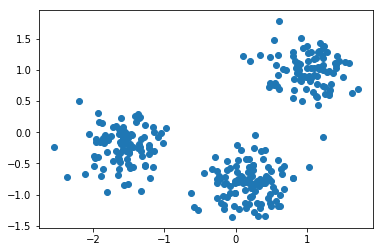

In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = np.genfromtxt('points.csv', delimiter=',')

xs = points[:, 0]
ys = points[:, 1]
plt.scatter(xs, ys)
plt.show()

### Clustering 2D points

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

You are given the array points from the previous exercise, and also an array new_points.

In [2]:
new_points = np.array([[  4.00233332e-01,  -1.26544471e+00],
       [  8.03230370e-01,   1.28260167e+00],
       [ -1.39507552e+00,   5.57292921e-02],
       [ -3.41192677e-01,  -1.07661994e+00],
       [  1.54781747e+00,   1.40250049e+00]])

In [3]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[2 0 1 2 0]


## Evaluating a clustering

### How many clusters of grain?

In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds).

In [4]:
grain_data = np.genfromtxt('Grains/seeds.csv', delimiter=',')
samples = grain_data[:, :7]
varieties = grain_data[:, 7]

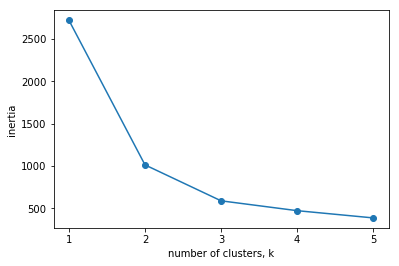

In [5]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


### Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [6]:
import pandas as pd

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties  1.0  2.0  3.0
labels                  
0           60   10    2
1            1   60    0
2            9    0   68


## Transforming features for better clusterings

### Scaling fish data for clustering

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education](http://ww2.amstat.org/publications/jse/jse_data_archive.htm).

In [7]:
fish_data = pd.read_csv('fish.csv', header=None)
samples = fish_data.iloc[:, 1:].values
species = fish_data.iloc[:,0].values

In [8]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


### Clustering the fish data

You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements. Your pipeline is available as pipeline, and the species of every fish sample is given by the list species.

In [9]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1            1     0     19      1
2           33     0      1      0
3            0     0      0     13


### Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.

In [10]:
stock_data = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
movements = stock_data.iloc[:, 1:].values
companies = stock_data.iloc[:, 0].values

In [11]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

### Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline pipeline containing a KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list companies of the company names is available.

In [12]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by='labels'))


                             companies  labels
1                                  AIG       0
26                      JPMorgan Chase       0
3                     American express       0
58                               Xerox       0
5                      Bank of America       0
18                       Goldman Sachs       0
16                   General Electrics       0
15                                Ford       0
55                         Wells Fargo       0
11                               Cisco       1
14                                Dell       1
33                           Microsoft       1
22                                  HP       1
31                           McDonalds       2
36                    Northrop Grumman       2
37                            Novartis       2
49                               Total       2
30                          MasterCard       2
41                       Philip Morris       2
42                   Royal Dutch Shell       2
43           